# Proyek Analisis Data: Bike Sharing Dataset Analysis


- **Nama:** Hajid Lutfi Hidayanto
- **Email:** hajidlutfi@gmail.com
- **ID Dicoding:** lutfi_hida

## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca dan musim memengaruhi jumlah sepeda yang disewa?
- Apa pengaruh hari kerja dan hari libur terhadap jumlah penyewaan sepeda?
- Apakah ada pengaruh signifikan dari kecepatan angin atau kelembapan terhadap penyewaan sepeda?
- Bagaimana tren penyewaan sepeda berkembang dari tahun ke tahunnya?

## Import Semua Packages/Library yang Digunakan

In [1]:
from google.colab import userdata
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# from IPython.core.interactiveshell import InteractiveShell

# InteractiveShell.ast_node_interactivity = "all"

In [2]:
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')
os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')

## Data Wrangling

### Gathering Data

In [3]:
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset

!unzip bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
  0% 0.00/286k [00:00<?, ?B/s]
100% 286k/286k [00:00<00:00, 46.8MB/s]
Archive:  bike-sharing-dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


In [4]:
# Dataset metadata
!cat Readme.txt

Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

In [5]:
day_df = pd.read_csv('day.csv')
print(f"Jumlah data: {len(day_df)}")
day_df.head()

Jumlah data: 731


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour_df = pd.read_csv('hour.csv')
print(f"Jumlah data: {len(hour_df)}")
hour_df.head()

Jumlah data: 17379


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- **Sistem Rental/Sewa Sepeda Otomatis**: Bike-Sharing adalah sistem penyewaan sepeda otomatis, memungkinkan pengguna menyewa dan mengembalikan sepeda di lokasi berbeda secara otomatis.
- **Data Mobilitas Kota**: Dataset mencakup data durasi perjalanan, posisi keberangkatan dan kedatangan, yang bisa digunakan sebagai sensor virtual untuk memantau mobilitas di kota.
- **Faktor yang Mempengaruhi Penyewaan Sepeda**: Penyewaan dipengaruhi oleh faktor lingkungan dan musiman seperti cuaca, curah hujan, hari dalam minggu, musim, dan jam.
- **Periode Data**: Data diambil dari tahun 2011-2012 dari sistem Capital Bikeshare di Washington D.C.
- **Struktur Data**:
  - **Field Utama**: Tanggal(dteday), musim(season), tahun(yr), bulan(mnth), jam(hour), cuaca(weathersit), suhu(temp), kelembaban(hum), kecepatan angin(windspeed), pengguna biasa(casual), pengguna terdaftar(registered), total penyewaan(cnt).
    - **weathersit**:  
      1 - Clear, Few clouds, Partly cloudy, Partly cloudy  
      2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
      3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
      4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
    - **season**:   
      1 - springer  
      2 - summer  
      3 - fall  
      4 - winter
  - **File Data**: Tersedia dalam dua format agregat:
    - **hour.csv**: Data agregat per jam.
    - **day.csv**: Data agregat per hari.

### Assessing Data

#### Data harian

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
print(f"Jumlah duplikasi: {day_df.duplicated().sum()}")
print(f"Jumlah missing value: {day_df.isnull().sum().sum()}\n{day_df.isnull().sum()}")
day_df.describe().round(2)

Jumlah duplikasi: 0
Jumlah missing value: 0
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.00,731.00,731.0,731.00,731.00,731.0,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00
mean,366.00,2.50,0.5,6.52,0.03,3.0,0.68,1.40,0.50,0.47,0.63,0.19,848.18,3656.17,4504.35
std,211.17,1.11,0.5,3.45,0.17,2.0,0.47,0.54,0.18,0.16,0.14,0.08,686.62,1560.26,1937.21
min,1.00,1.00,0.0,1.00,0.00,0.0,0.00,1.00,0.06,0.08,0.00,0.02,2.00,20.00,22.00
25%,183.50,2.00,0.0,4.00,0.00,1.0,0.00,1.00,0.34,0.34,0.52,0.13,315.50,2497.00,3152.00
50%,366.00,3.00,1.0,7.00,0.00,3.0,1.00,1.00,0.50,0.49,0.63,0.18,713.00,3662.00,4548.00
75%,548.50,3.00,1.0,10.00,0.00,5.0,1.00,2.00,0.66,0.61,0.73,0.23,1096.00,4776.50,5956.00
max,731.00,4.00,1.0,12.00,1.00,6.0,1.00,3.00,0.86,0.84,0.97,0.51,3410.00,6946.00,8714.00


#### Data per jam

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
print(f"Jumlah duplikasi: {hour_df.duplicated().sum()}")
print(f"Jumlah missing value: {hour_df.isnull().sum().sum()}\n{hour_df.isnull().sum()}")
hour_df.describe().round(2)

Jumlah duplikasi: 0
Jumlah missing value: 0
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.00,17379.00,17379.0,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00
mean,8690.00,2.50,0.5,6.54,11.55,0.03,3.00,0.68,1.43,0.50,0.48,0.63,0.19,35.68,153.79,189.46
std,5017.03,1.11,0.5,3.44,6.91,0.17,2.01,0.47,0.64,0.19,0.17,0.19,0.12,49.31,151.36,181.39
min,1.00,1.00,0.0,1.00,0.00,0.00,0.00,0.00,1.00,0.02,0.00,0.00,0.00,0.00,0.00,1.00
25%,4345.50,2.00,0.0,4.00,6.00,0.00,1.00,0.00,1.00,0.34,0.33,0.48,0.10,4.00,34.00,40.00
50%,8690.00,3.00,1.0,7.00,12.00,0.00,3.00,1.00,1.00,0.50,0.48,0.63,0.19,17.00,115.00,142.00
75%,13034.50,3.00,1.0,10.00,18.00,0.00,5.00,1.00,2.00,0.66,0.62,0.78,0.25,48.00,220.00,281.00
max,17379.00,4.00,1.0,12.00,23.00,1.00,6.00,1.00,4.00,1.00,1.00,1.00,0.85,367.00,886.00,977.00


**Insight:**
- Dataset memiliki 15 kolom dan 731 data.
- Tidak ada duplikasi dalam dataset.
- Tidak ada missing value dalam dataset.
- Dataset sudah cenderung clean.
- Tipe data dteday sebaikya diganti menjadi datetime.
- Fitur kategorikal: weathersit & season ter-encoded dengan integer encoding.
- Fitur kategorikal tidak perlu diubah menjadi string untuk memudahkan jika akan dibuat model.
- Nama-nama fitur sebaiknya diubah agar lebih mudah dibaca.
- Kolom instant dapat di-drop karena sudah ada index dari pandas.


### Cleaning Data

#### Memperbaiki tipe data

In [11]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

day_df['dteday'].info()
hour_df['dteday'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 731 entries, 0 to 730
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
731 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB
<class 'pandas.core.series.Series'>
RangeIndex: 17379 entries, 0 to 17378
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
17379 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 135.9 KB


#### Me-rename nama fitur

In [12]:
new_columns = {
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather',
    'hum': 'humidity',
    'cnt': 'count'
}

day_df.rename(columns=new_columns, inplace=True)
new_columns['hr'] = 'hour'
hour_df.rename(columns=new_columns, inplace=True)

print("Daily:")
day_df.head()
print("Hourly:")
hour_df.head()

Daily:
Hourly:


,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Drop kolom yang tidak dibutuhkan

In [13]:
day_df = day_df.drop(columns=['instant'],)
hour_df = hour_df.drop(columns=['instant'])

print("Daily: ")
day_df.head()
print("Hourly: ")
hour_df.head()

Daily: 
Hourly: 


,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Sekarang data sudah clean.

## Exploratory Data Analysis (EDA)

### Explore `day_df` & `hour_df`


In [14]:
SEASONS = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
WEATHERS = {
    1: 'Clear',
    2: 'Cloudy/Mist',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
}

def separator():
  print('-----------------------------------------------')

In [15]:
day_df.describe(include='all').round(2)

,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,731,731.00,731.0,731.00,731.00,731.0,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00
mean,2012-01-01 00:00:00,2.50,0.5,6.52,0.03,3.0,0.68,1.40,0.50,0.47,0.63,0.19,848.18,3656.17,4504.35
min,2011-01-01 00:00:00,1.00,0.0,1.00,0.00,0.0,0.00,1.00,0.06,0.08,0.00,0.02,2.00,20.00,22.00
25%,2011-07-02 12:00:00,2.00,0.0,4.00,0.00,1.0,0.00,1.00,0.34,0.34,0.52,0.13,315.50,2497.00,3152.00
50%,2012-01-01 00:00:00,3.00,1.0,7.00,0.00,3.0,1.00,1.00,0.50,0.49,0.63,0.18,713.00,3662.00,4548.00
75%,2012-07-01 12:00:00,3.00,1.0,10.00,0.00,5.0,1.00,2.00,0.66,0.61,0.73,0.23,1096.00,4776.50,5956.00
max,2012-12-31 00:00:00,4.00,1.0,12.00,1.00,6.0,1.00,3.00,0.86,0.84,0.97,0.51,3410.00,6946.00,8714.00
std,NaN,1.11,0.5,3.45,0.17,2.0,0.47,0.54,0.18,0.16,0.14,0.08,686.62,1560.26,1937.21


#### Musim dan Cuaca

In [16]:
# hour
season_hour_df = hour_df.groupby('season').agg({
    'count': 'sum',
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()
season_hour_df['season'] = season_hour_df['season'].map(SEASONS)
print(f"hour: \n{season_hour_df}")

separator()
# day
season_day_df = day_df.groupby('season').agg({
    'count': 'sum',
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()
season_day_df['season'] = season_day_df['season'].map(SEASONS)
print("day: ")
season_day_df

hour: 
   season    count  casual  registered
0  Spring   471348   60622      410726
1  Summer   918589  203522      715067
2    Fall  1061129  226091      835038
3  Winter   841613  129782      711831
-----------------------------------------------
day: 


,season,count,casual,registered
0,Spring,471348,60622,410726
1,Summer,918589,203522,715067
2,Fall,1061129,226091,835038
3,Winter,841613,129782,711831


In [17]:
#hour
weather_hour_df = hour_df.groupby('weather').agg({
    'count': 'sum',
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()
weather_hour_df['weather'] = weather_hour_df['weather'].map(WEATHERS)
print("hour: \n",weather_hour_df)

separator()
#day
weather_day_df = day_df.groupby('weather').agg({
    'count': 'sum',
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()
weather_day_df['weather'] = weather_day_df['weather'].map(WEATHERS)
print("day: ")
weather_day_df

hour: 
            weather    count  casual  registered
0            Clear  2338173  462745     1875428
1      Cloudy/Mist   795952  134481      661471
2  Light Rain/Snow   158331   22783      135548
3  Heavy Rain/Snow      223       8         215
-----------------------------------------------
day: 


,weather,count,casual,registered
0,Clear,2257952,446346,1811606
1,Cloudy/Mist,996858,169776,827082
2,Light Rain/Snow,37869,3895,33974


In [18]:
#hour
season_weather_hour_df = hour_df.groupby(['season', 'weather']).agg({
    'count': 'sum',
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()
season_weather_hour_df['season'] = season_weather_hour_df['season'].map(SEASONS)
season_weather_hour_df['weather'] = season_weather_hour_df['weather'].map(WEATHERS)
print(f"hour: {season_weather_hour_df}")

separator()
#day
season_weather_day_df = day_df.groupby(['season', 'weather']).agg({
    'count': 'sum',
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()
season_weather_day_df['season'] = season_weather_day_df['season'].map(SEASONS)
season_weather_day_df['weather'] = season_weather_day_df['weather'].map(WEATHERS)
print("day: ")
season_weather_day_df

hour:     season          weather   count  casual  registered
0   Spring            Clear  325278   44462      280816
1   Spring      Cloudy/Mist  124205   14760      109445
2   Spring  Light Rain/Snow   21642    1392       20250
3   Spring  Heavy Rain/Snow     223       8         215
4   Summer            Clear  664463  151197      513266
5   Summer      Cloudy/Mist  207363   44912      162451
6   Summer  Light Rain/Snow   46763    7413       39350
7     Fall            Clear  801941  174014      627927
8     Fall      Cloudy/Mist  212932   42350      170582
9     Fall  Light Rain/Snow   46256    9727       36529
10  Winter            Clear  546491   93072      453419
11  Winter      Cloudy/Mist  251452   32459      218993
12  Winter  Light Rain/Snow   43670    4251       39419
-----------------------------------------------
day: 


,season,weather,count,casual,registered
0,Spring,Clear,312036,41562,270474
1,Spring,Cloudy/Mist,155573,18779,136794
2,Spring,Light Rain/Snow,3739,281,3458
3,Summer,Clear,626986,146388,480598
4,Summer,Cloudy/Mist,288096,56714,231382
5,Summer,Light Rain/Snow,3507,420,3087
6,Fall,Clear,799443,167945,631498
7,Fall,Cloudy/Mist,250679,56407,194272
8,Fall,Light Rain/Snow,11007,1739,9268
9,Winter,Clear,519487,90451,429036


**Insight:**
- Cuaca sangat mempengaruhi jumlah penyewa, dapat dilihat pada perbedaan yang jauh antara cuaca clear dan cuaca yang lain.
- Cuaca Heavy rain/snow hanya ada pada data per jam, tidak ada pada data harian.
- Musim juga mempengaruhi jumlah penyewa, musim dengan jumlah penyewa sepeda terbanyak adalah fall dan yang paling sedikit adalah spring.

#### Hari kerja dan libur

In [19]:
#day
libur_count = len(day_df[day_df['workingday'] == 0])
kerja_count = len(day_df[day_df['workingday'] == 1])
print("Day: ")
print(f"Jumlah hari libur: {libur_count}")
print(f"Jumlah hari kerja: {kerja_count}")
print(f"Total hari: {len(day_df)}")

Day: 
Jumlah hari libur: 231
Jumlah hari kerja: 500
Total hari: 731


In [20]:
work_or_holiday_day_df = day_df.groupby('workingday').agg({
    'count': 'sum',
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()
work_or_holiday_day_df

,workingday,count,casual,registered
0,0,1000269,316732,683537
1,1,2292410,303285,1989125


In [21]:
work_or_holiday_day_df['day_count'] = [libur_count, kerja_count]
work_or_holiday_day_df

,workingday,count,casual,registered,day_count
0,0,1000269,316732,683537,231
1,1,2292410,303285,1989125,500


In [22]:
print(f"Rata-rata penyewa per hari saat hari kerja: {work_or_holiday_day_df['count'][1]//len(day_df[day_df['workingday'] == 1])} ")
print(f"Rata-rata penyewa per hari saat hari libur: {work_or_holiday_day_df['count'][0]//len(day_df[day_df['workingday'] == 0])} ")

Rata-rata penyewa per hari saat hari kerja: 4584 
Rata-rata penyewa per hari saat hari libur: 4330 


**Insight:**
- Hari kerja/libur tidak terlalu mempengaruhi jumlah penyewa.
- Jumlah rata-rata penyewa per hari saat hari kerja dan libur cenderung mirip.

#### Kecepatan angin dan kelembapan

In [23]:
windspeed_day_df = day_df.groupby('windspeed').agg({
    'count': 'sum',
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()
windspeed_day_df

,windspeed,count,casual,registered
0,0.022392,4985,949,4036
1,0.042304,5117,1514,3603
2,0.045404,5409,2235,3174
3,0.045408,1712,120,1592
4,0.046650,5087,337,4750
...,...,...,...,...
645,0.417908,1913,208,1705
646,0.421642,2732,317,2415
647,0.422275,4195,471,3724
648,0.441563,5382,486,4896


In [24]:
humidity_day_df = day_df.groupby('humidity').agg({
    'count': 'sum',
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()
humidity_day_df

,humidity,count,casual,registered
0,0.000000,623,46,577
1,0.187917,1635,532,1103
2,0.254167,6857,3252,3605
3,0.275833,5169,2230,2939
4,0.290000,5102,531,4571
...,...,...,...,...
590,0.948261,605,114,491
591,0.949583,2594,126,2468
592,0.962500,1607,69,1538
593,0.970417,705,50,655


In [25]:
day_df[['windspeed', 'count']].corr()

,windspeed,count
windspeed,1.000000,-0.234545
count,-0.234545,1.000000


In [26]:
day_df[['humidity', 'count']].corr()

,humidity,count
humidity,1.000000,-0.100659
count,-0.100659,1.000000


**Insight:**
- Windspeed/Kecepatan angin cukup berpengaruh terhadap jumlah penyewa sepeda.
- Humidity/Kelembapan tidak terlalu berpengaruh terhadap jumlah penyewa sepeda.

#### Tren Sepeda

In [27]:
print(f"Jumlah tahun data: {len(day_df['year'].unique())}")
print(f"Rentang data: {day_df['date'].min()} - {day_df['date'].max()}")

Jumlah tahun data: 2
Rentang data: 2011-01-01 00:00:00 - 2012-12-31 00:00:00


In [28]:
mean_count_2011 = day_df[day_df['year'] == 0]['count'].mean()
mean_count_2012 = day_df[day_df['year'] == 1]['count'].mean()

print(f"Rata-rata penyewaan sepeda pada tahun 2011: {mean_count_2011}")
print(f"Rata-rata penyewaan sepeda pada tahun 2012: {mean_count_2012}")

Rata-rata penyewaan sepeda pada tahun 2011: 3405.7616438356163
Rata-rata penyewaan sepeda pada tahun 2012: 5599.934426229508


In [29]:
def mean_per_quartile(df, year):
    year_df = df[df['year'] == year]

    quartiles = year_df['count'].quantile([0.25, 0.5, 0.75]).values
    bins = [0, quartiles[0], quartiles[1], quartiles[2], year_df['count'].max()]
    labels = ['Q1', 'Q2', 'Q3', 'Q4']

    year_df['quartile'] = pd.cut(year_df['count'], bins=bins, labels=labels, include_lowest=True)

    mean_counts = year_df.groupby('quartile')['count'].mean()

    return mean_counts

mean_counts_2011 = mean_per_quartile(day_df, year=0)

print("Rata-rata penyewaan sepeda per kuartil pada tahun 2011:")
mean_counts_2011

Rata-rata penyewaan sepeda per kuartil pada tahun 2011:


<ipython-input-29-d3dbdb0430b6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_df['quartile'] = pd.cut(year_df['count'], bins=bins, labels=labels, include_lowest=True)
<ipython-input-29-d3dbdb0430b6>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_counts = year_df.groupby('quartile')['count'].mean()


,count
quartile,
Q1,1473.804348
Q2,3008.571429
Q3,4183.769231
Q4,4978.131868


In [30]:
mean_counts_2012 = mean_per_quartile(day_df, year=1)
print("\nRata-rata penyewaan sepeda per kuartil pada tahun 2012:")
mean_counts_2012


Rata-rata penyewaan sepeda per kuartil pada tahun 2012:


<ipython-input-29-d3dbdb0430b6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_df['quartile'] = pd.cut(year_df['count'], bins=bins, labels=labels, include_lowest=True)
<ipython-input-29-d3dbdb0430b6>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_counts = year_df.groupby('quartile')['count'].mean()


,count
quartile,
Q1,3056.750000
Q2,5271.362637
Q3,6510.032967
Q4,7567.913043


**Insight:**
- Tren penyewaan sepeda naik hampir 2x lipat dari tahun 2011 ke tahun 2012.
- Tren penyewaan sepeda umumnya lebih sedikit pada awal tahun lalu semakin naik hingga akhir tahun.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana cuaca dan musim memengaruhi jumlah sepeda yang disewa?

<ipython-input-31-11e47016b8f3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weather", y="count", data=weather_day_df, palette=colors, ax=ax[0])
<ipython-input-31-11e47016b8f3>:3: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(x="weather", y="count", data=weather_day_df, palette=colors, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a fu

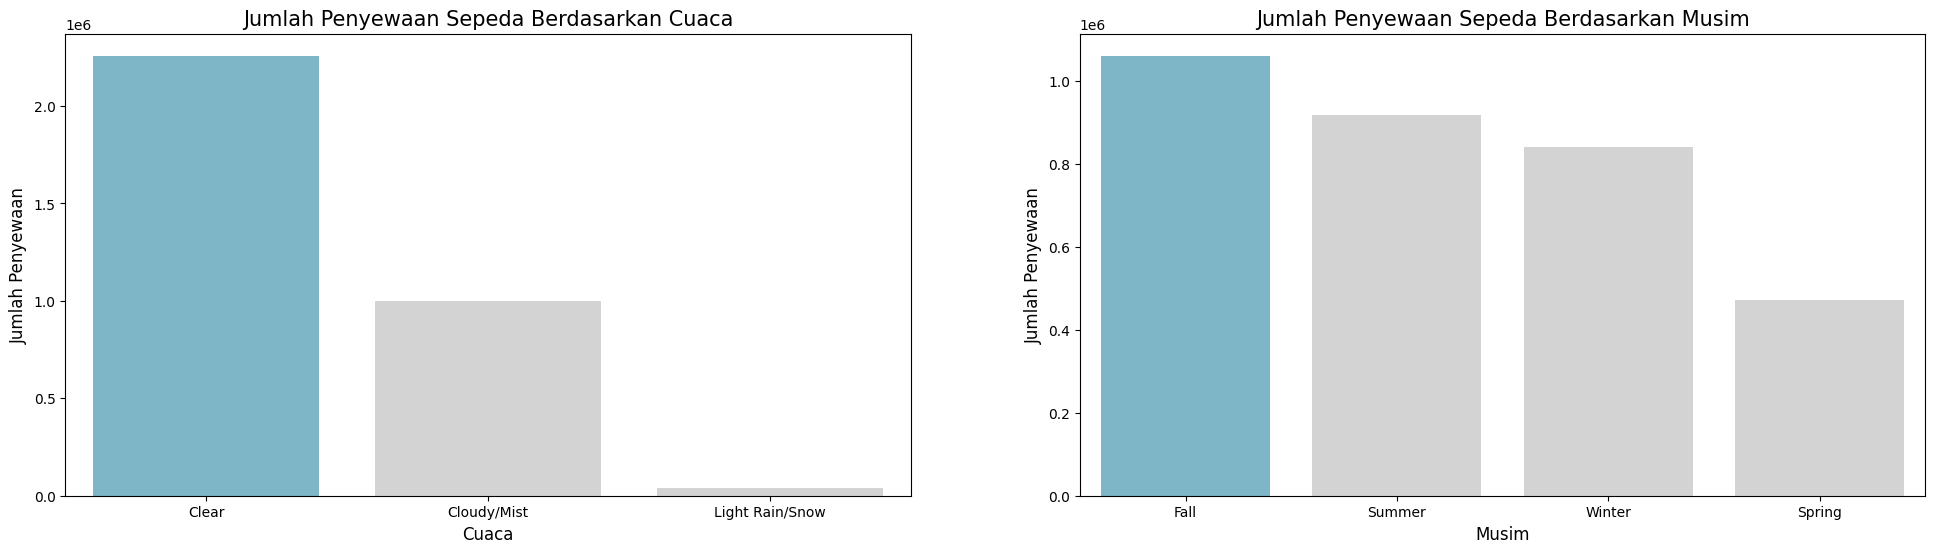

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x="weather", y="count", data=weather_day_df, palette=colors, ax=ax[0])
ax[0].set_title('Jumlah Penyewaan Sepeda Berdasarkan Cuaca', fontsize=15)
ax[0].set_xlabel('Cuaca', fontsize=12)
ax[0].set_ylabel('Jumlah Penyewaan', fontsize=12)

sns.barplot(x="season", y="count", data=season_day_df.sort_values(by='count', ascending=False), palette=colors, ax=ax[1])
ax[1].set_title('Jumlah Penyewaan Sepeda Berdasarkan Musim', fontsize=15)
ax[1].set_xlabel('Musim', fontsize=12)
ax[1].set_ylabel('Jumlah Penyewaan', fontsize=12)

plt.show()

Heavy rain: 223


<ipython-input-32-e33fe71257e3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weather", y="count", data=weather_hour_df, palette=colors)
<ipython-input-32-e33fe71257e3>:4: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x="weather", y="count", data=weather_hour_df, palette=colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pa

Text(0, 0.5, 'Jumlah Penyewaan')

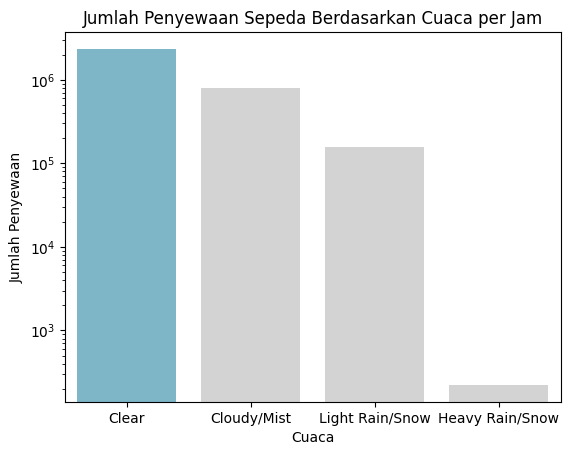

In [32]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

print(f"Heavy rain: {weather_hour_df.iloc[3]['count']}")
sns.barplot(x="weather", y="count", data=weather_hour_df, palette=colors)
plt.yscale('log')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Cuaca per Jam')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Penyewaan')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


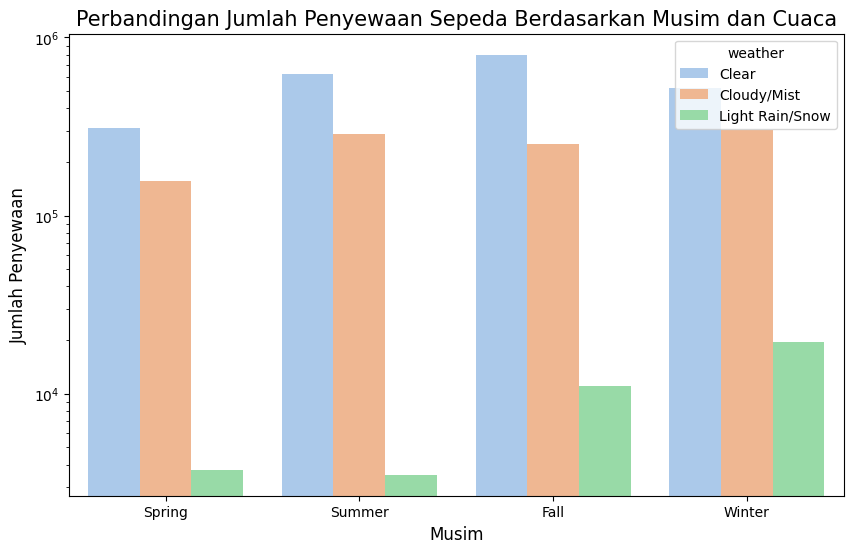

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='count', hue='weather', data=season_weather_day_df, palette='pastel')

plt.title('Perbandingan Jumlah Penyewaan Sepeda Berdasarkan Musim dan Cuaca', fontsize=15)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.yscale('log')

plt.show()

**Insight:**
- Cuaca sangat mempengaruhi jumlah penyewaan sepeda. Cuaca berbanding lurus dengan jumlah penyewaan sepeda.
- Musim berpngaruh dengan jumlah penyewaan sepeda, dengan musim dengan jumlah penyewa paling banyak adalah fall dan paling sedikit adalah spring.

### Pertanyaan 2: Apa pengaruh hari kerja dan hari libur terhadap jumlah penyewaan sepeda?


<ipython-input-34-4dec2c4e9f3b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_hari, y='rata-rata', data=work_or_holiday_day_df, palette='pastel')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


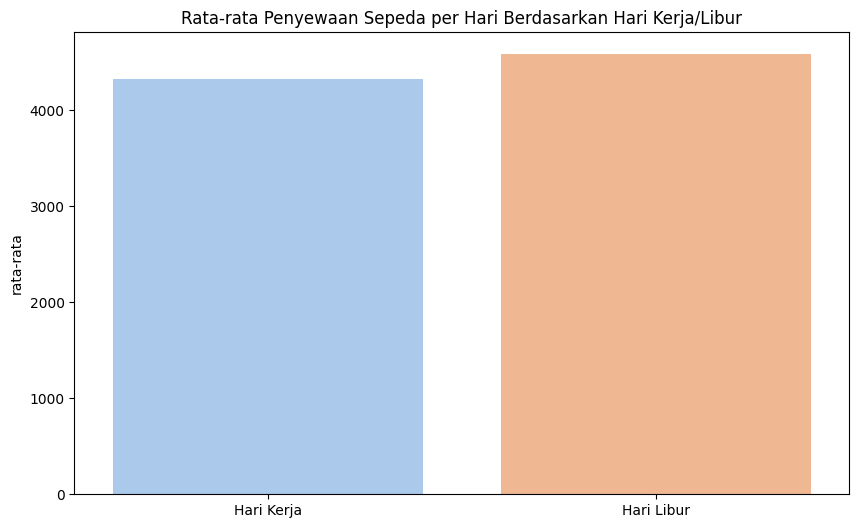

In [34]:
type_hari = ('Hari Kerja', 'Hari Libur')

work_or_holiday_day_df['rata-rata'] = work_or_holiday_day_df['count'] // work_or_holiday_day_df['day_count']
plt.figure(figsize=(10, 6))
sns.barplot(x=type_hari, y='rata-rata', data=work_or_holiday_day_df, palette='pastel')
plt.title('Rata-rata Penyewaan Sepeda per Hari Berdasarkan Hari Kerja/Libur')
plt.show()

In [35]:
work_or_holiday_day_df

,workingday,count,casual,registered,day_count,rata-rata
0,0,1000269,316732,683537,231,4330
1,1,2292410,303285,1989125,500,4584


**Insight:**
- Rata-rata jumlah penyewa sepeda pada hari kerja dan hari libur cenderung mirip.

### Pertanyaan 3: Apakah ada pengaruh signifikan dari kecepatan angin atau kelembapan terhadap penyewaan sepeda?


In [36]:
scaler = MinMaxScaler()
windspeed_hum_normalized = scaler.fit_transform(day_df[['windspeed', 'count', 'humidity']])

windspeed_hum_normalized_df = pd.concat([day_df['date'], pd.DataFrame(windspeed_hum_normalized, columns=['windspeed', 'count', 'humidity'])], axis=1)

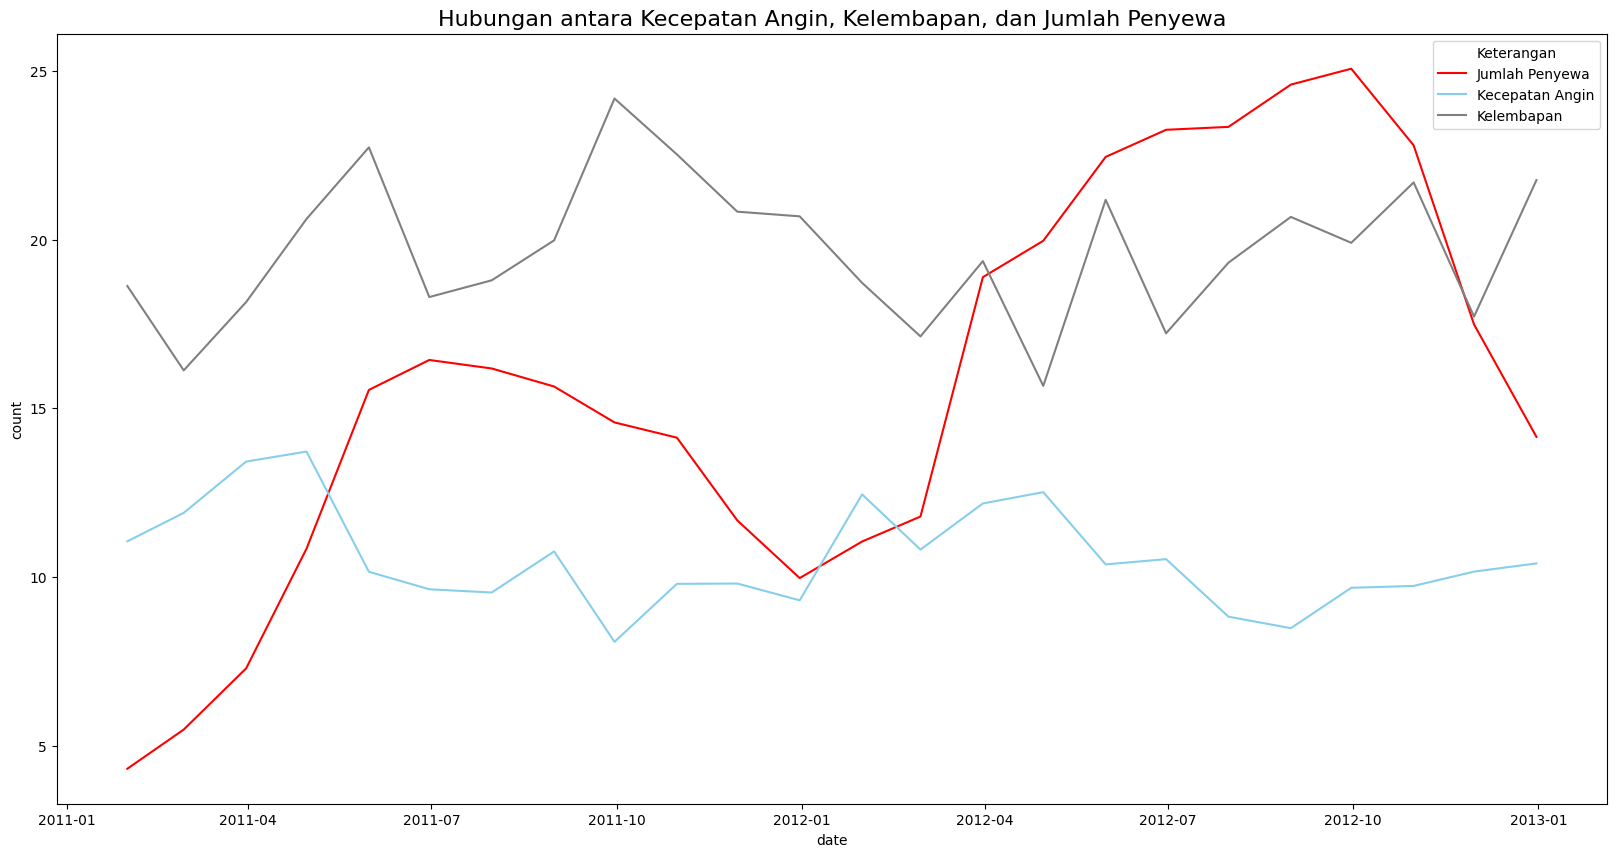

In [37]:
monthly_df = windspeed_hum_normalized_df.resample(on='date', rule='ME').sum().reset_index()

plt.figure(figsize=(20, 10))
sns.lineplot(x='date', y='count', data=monthly_df, label='Jumlah Penyewa', color='red')
sns.lineplot(x='date', y='windspeed', data=monthly_df, label='Kecepatan Angin', color='skyblue')
sns.lineplot(x='date', y='humidity', data=monthly_df, label='Kelembapan', color='grey')

plt.title('Hubungan antara Kecepatan Angin, Kelembapan, dan Jumlah Penyewa', fontsize=16)

plt.legend(title='Keterangan')

plt.show()

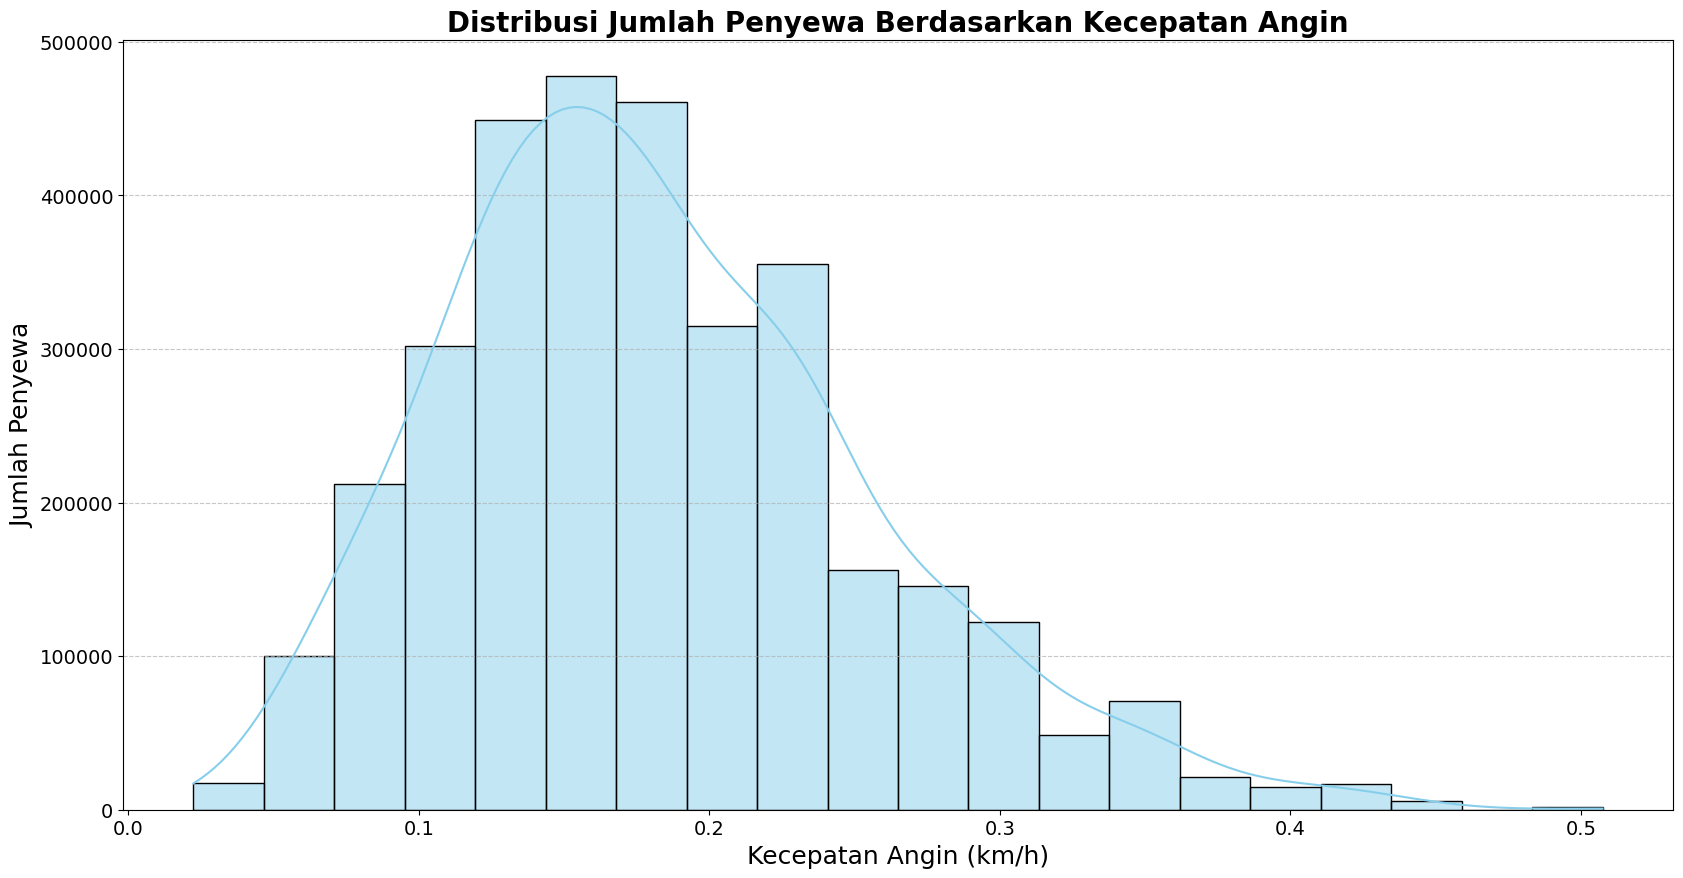

In [38]:
plt.figure(figsize=(20, 10))

sns.histplot(data=windspeed_day_df, x='windspeed', weights='count', bins=20, color='skyblue', kde=True, stat='count')

plt.title('Distribusi Jumlah Penyewa Berdasarkan Kecepatan Angin', fontsize=20, fontweight='bold')
plt.xlabel('Kecepatan Angin (km/h)', fontsize=18)
plt.ylabel('Jumlah Penyewa', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

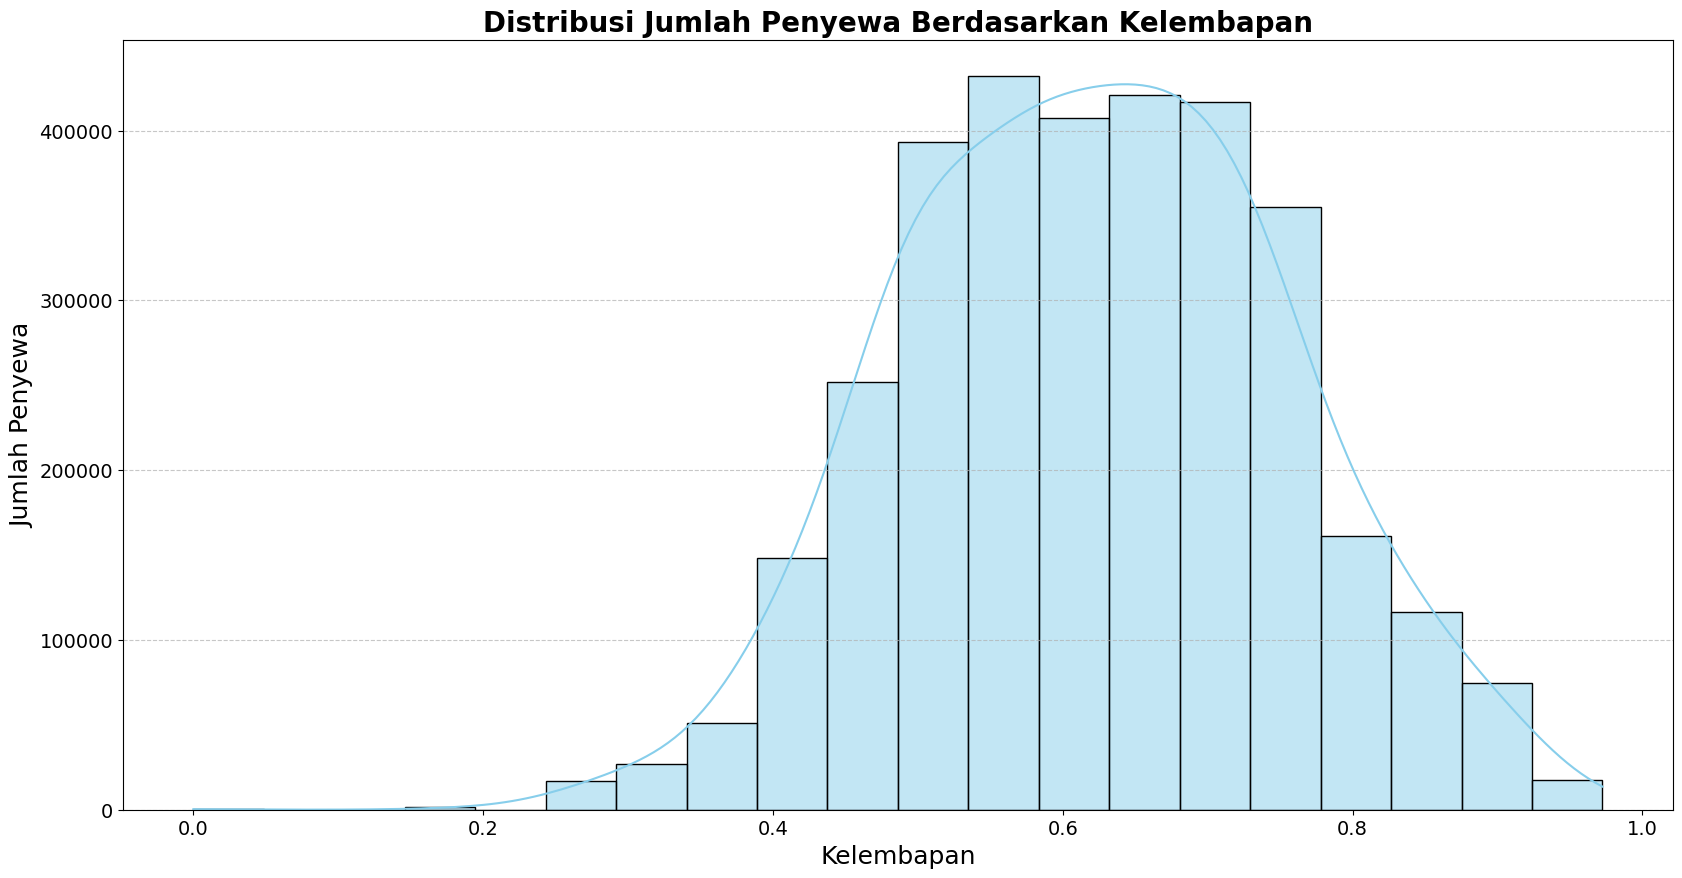

In [39]:
plt.figure(figsize=(20, 10))

sns.histplot(data=humidity_day_df, x='humidity', weights='count', bins=20, color='skyblue', kde=True, stat='count')

plt.title('Distribusi Jumlah Penyewa Berdasarkan Kelembapan', fontsize=20, fontweight='bold')
plt.xlabel('Kelembapan', fontsize=18)
plt.ylabel('Jumlah Penyewa', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Insight:**
- Kecepatan angin cenderung berbanding terbalik dengan jumlah penyewa sepeda.
- Kelembapan tidak terlalu berpengaruh dengan jumlah penyewa sepeda.

### Pertanyaan 4: Bagaimana tren penyewaan sepeda berkembang dari tahun ke tahunnya?

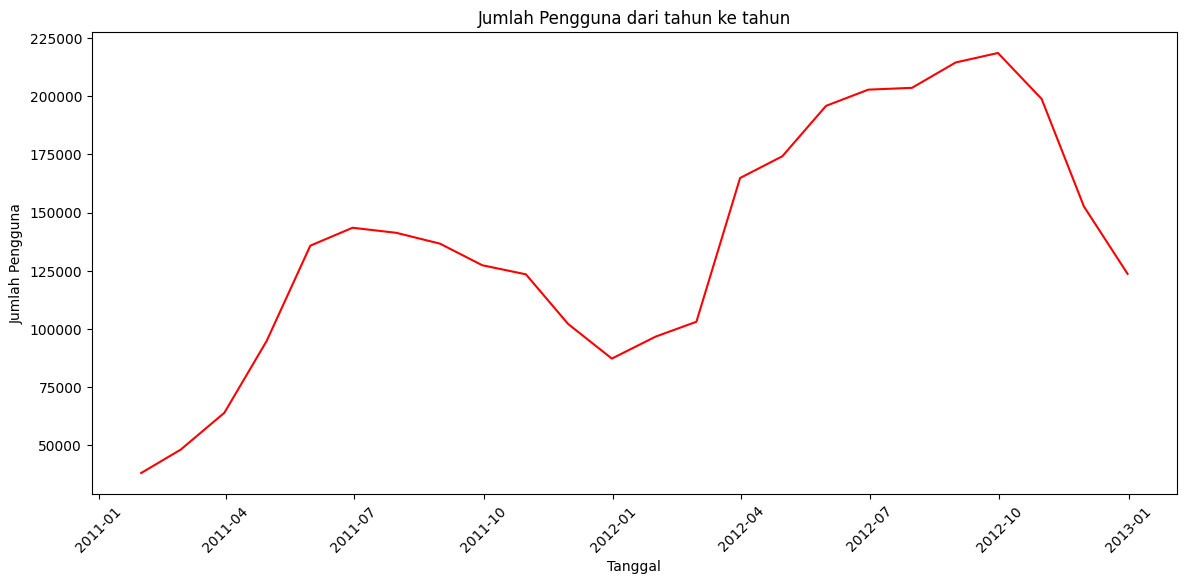

In [40]:
month_count_df = day_df.resample(on='date', rule='ME').sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=month_count_df, x='date', y='count', color='red')
plt.title('Jumlah Pengguna dari tahun ke tahun')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Grafik penyewaan sepeda dari tahun 2011 hingga 2013 cenderung uptrend/naik.
- Grafik selalu mengalami penurunan menjelang awal tahun.

## Analisis Lanjutan

#### Rfm Analysis

##### Recency

In [41]:
recent_day = day_df[day_df['date'] == day_df['date'].max()][['casual', 'registered']]
recent_24hour = hour_df[hour_df['date'] == hour_df['date'].max()][['hour', 'casual', 'registered']]
recent_hour = recent_24hour[recent_24hour['hour'] == recent_24hour['hour'].max()][['casual', 'registered']]

In [42]:
recent_24hour = recent_24hour.melt(id_vars='hour', var_name='type', value_name='count')

In [43]:
recent_24hour.head()

,hour,type,count
0,0,casual,4
1,1,casual,6
2,2,casual,3
3,3,casual,0
4,4,casual,0


<ipython-input-44-95a98647d5c7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_type, y=recent_day.iloc[0], palette='pastel', ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
<ipython-input-44-95a98647d5c7>:8: FutureWarning: 

Passing `palette` without assigning `

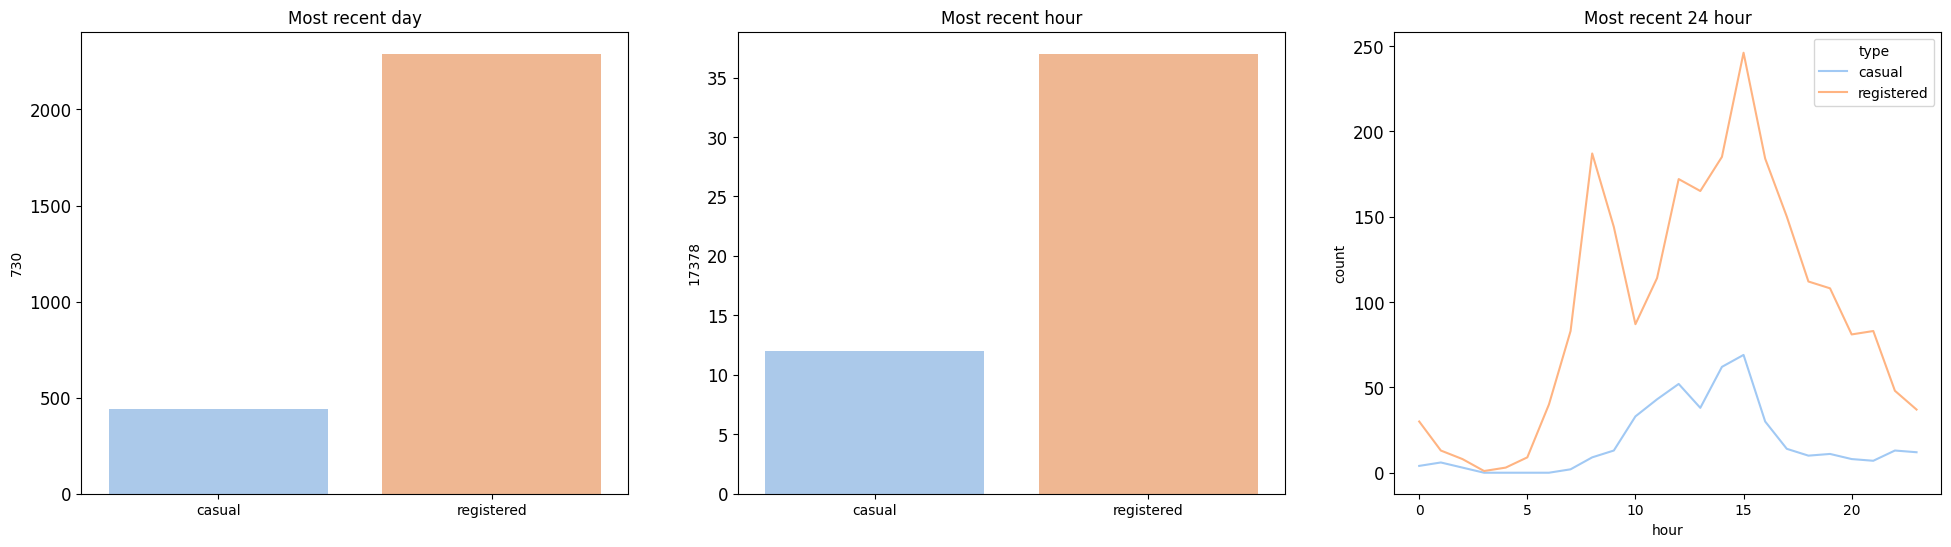

In [44]:
customer_type = ['casual', 'registered']

fig, ax = plt.subplots(ncols=3, figsize=(24, 6))
sns.barplot(x=customer_type, y=recent_day.iloc[0], palette='pastel', ax=ax[0])
ax[0].set_title('Most recent day')
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x=customer_type, y=recent_hour.iloc[0], palette='pastel', ax=ax[1])
ax[1].set_title('Most recent hour')
ax[1].tick_params(axis ='y', labelsize=12)

sns.lineplot(x='hour', y='count', hue='type', data=recent_24hour, palette='pastel', ax=ax[2])
ax[2].set_title('Most recent 24 hour')
ax[2].tick_params(axis ='y', labelsize=12)

##### Frequency

In [45]:
year_df = day_df.groupby(by='year').agg({
    'count': 'sum',
    'casual':'sum',
    'registered': 'sum'
}).reset_index()


type_customer = ['casual', 'registered']

year_melted_df = pd.melt(year_df, id_vars=['year'], value_vars=type_customer,
                    var_name='customer_type', value_name='count_sum')
year_melted_df

,year,customer_type,count_sum
0,0,casual,247252
1,1,casual,372765
2,0,registered,995851
3,1,registered,1676811


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
<ipython-input-46-02dff5391f7d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_type, y='count_sum', data=total_per_type, palette='pastel', ax=ax[1])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning

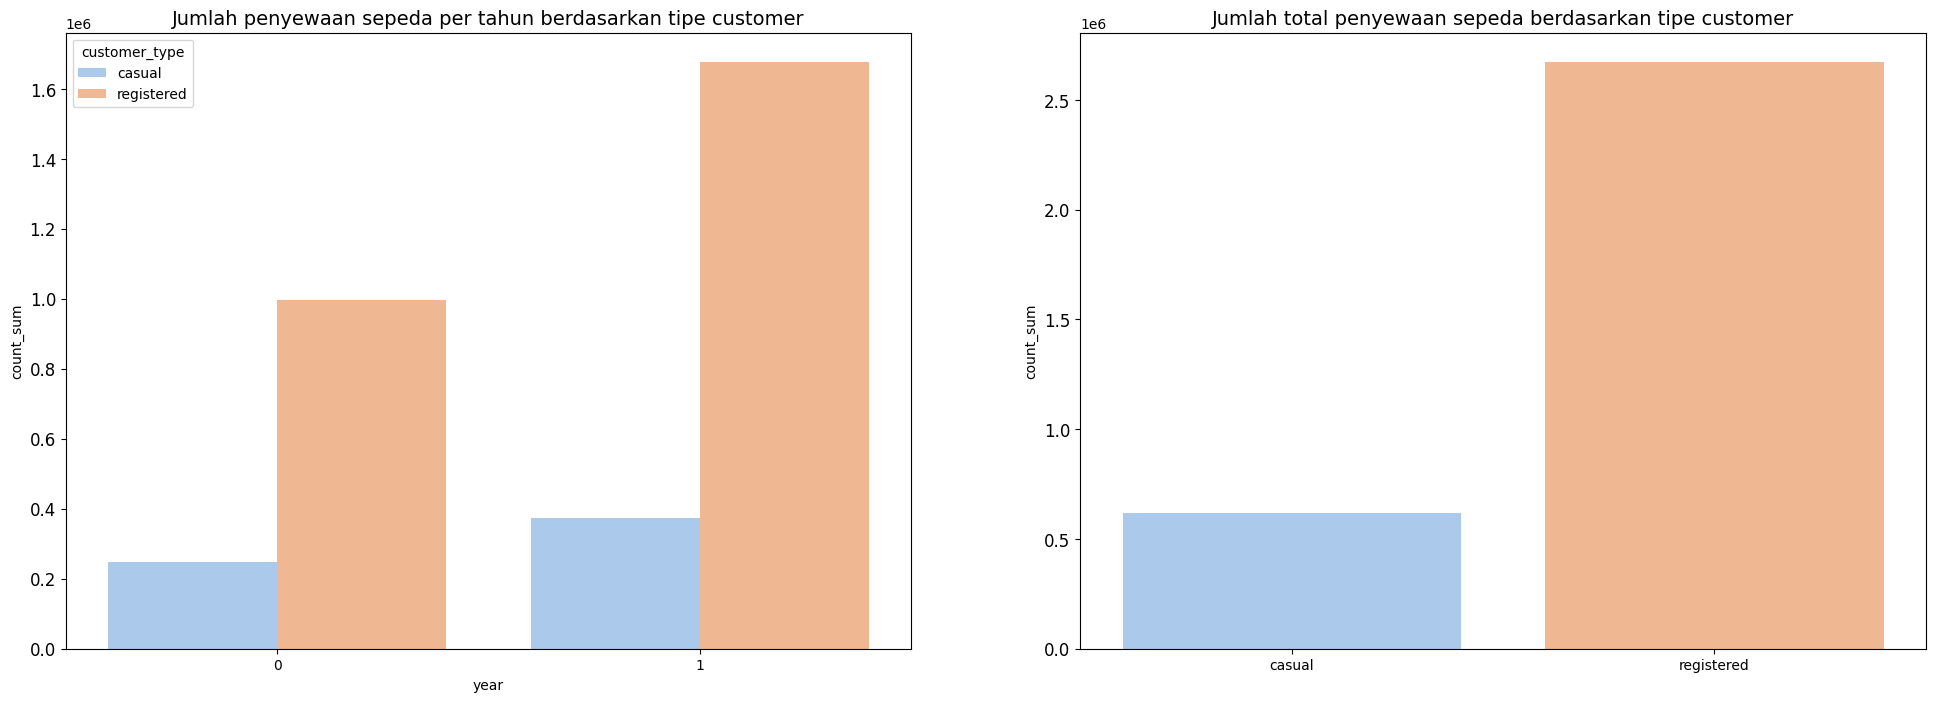

In [46]:
fig, ax = plt.subplots(ncols=2, figsize=(24, 8))

sns.barplot(x='year', y='count_sum', data=year_melted_df, hue='customer_type', palette='pastel', ax=ax[0])
ax[0].set_title('Jumlah penyewaan sepeda per tahun berdasarkan tipe customer', fontsize=14)
ax[0].tick_params(axis ='y', labelsize=12)

total_per_type = year_melted_df.groupby('customer_type')['count_sum'].sum()
total_per_type = total_per_type.reset_index()
sns.barplot(x=customer_type, y='count_sum', data=total_per_type, palette='pastel', ax=ax[1])
ax[1].set_title('Jumlah total penyewaan sepeda berdasarkan tipe customer', fontsize=14)
ax[1].tick_params(axis ='y', labelsize=12)

##### Monetary

In [54]:
monthly_df = day_df[['date', 'count']].resample(rule='ME', on='date').sum().reset_index()
monthly_df.head()

,date,count
0,2011-01-31,38189
1,2011-02-28,48215
2,2011-03-31,64045
3,2011-04-30,94870
4,2011-05-31,135821


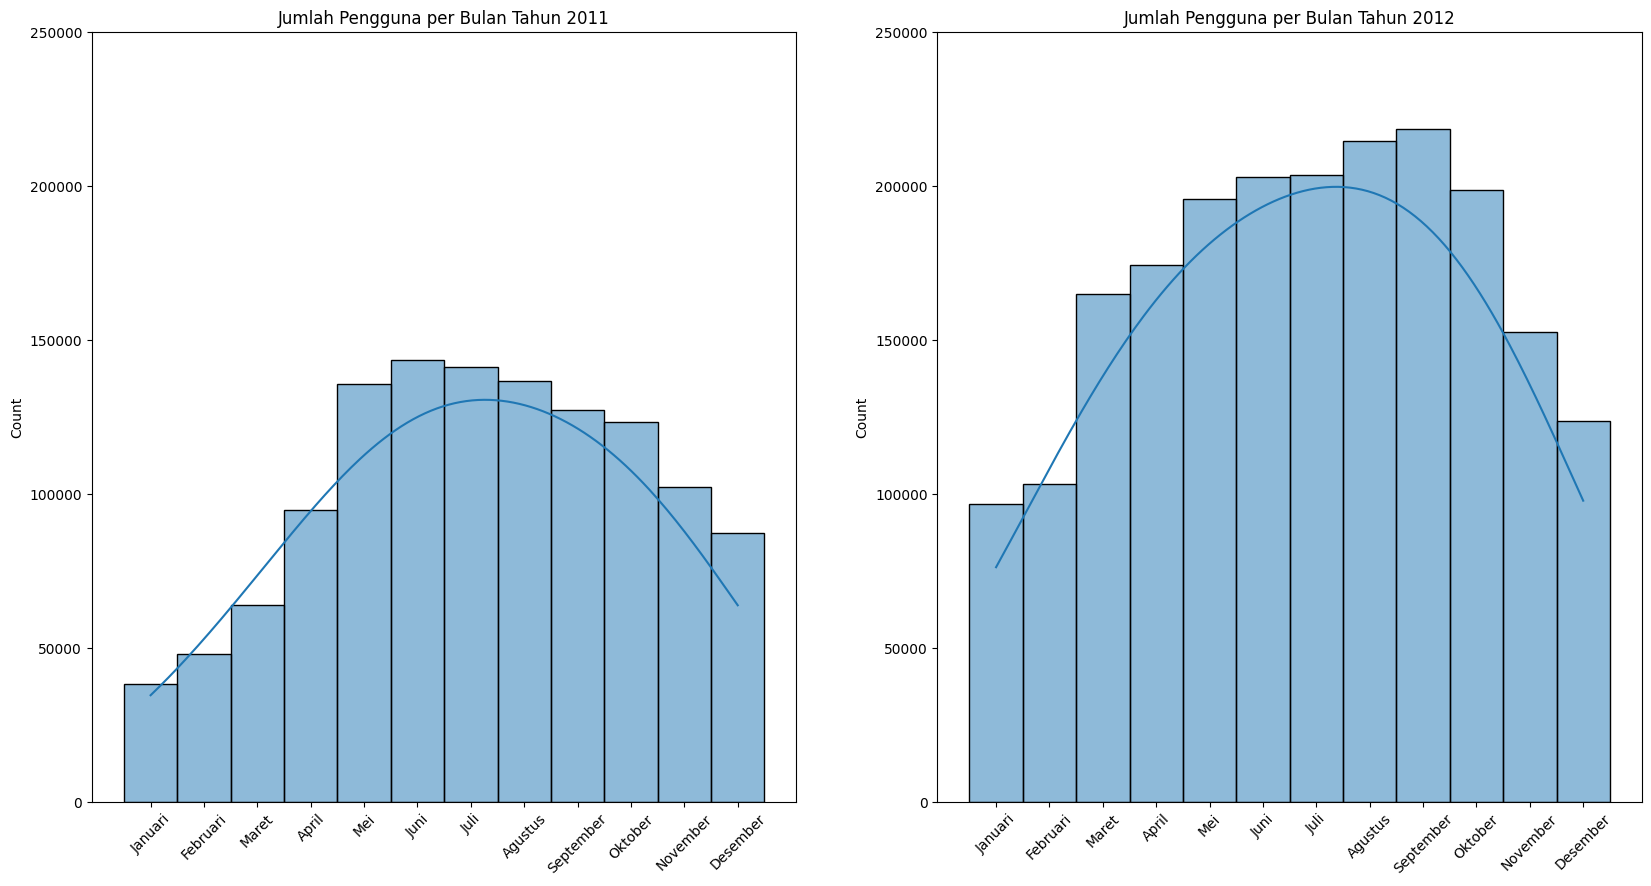

In [57]:
MONTHS = ('Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni',
          'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember')


fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
sns.histplot(data=monthly_df[:12], x=MONTHS, weights='count', discrete=True, ax=ax[0], kde=True)
ax[0].set_title('Jumlah Pengguna per Bulan Tahun 2011')
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_ylim(0, 2.5e5)


sns.histplot(data=monthly_df[12:], x=MONTHS, weights='count', discrete=True, ax=ax[1], kde=True)
ax[1].set_title('Jumlah Pengguna per Bulan Tahun 2012')
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_ylim(0, 2.5e5)

plt.show()

In [48]:
pengguna_2011 = year_df['count'][0]
pengguna_2012 = year_df['count'][1]

print(f"Jumlah pengguna sepeda tahun 2011: {pengguna_2011}")
print(f"Jumlah pengguna sepeda tahun 2012: {pengguna_2012}")
print(f"Jumlah pengguna sepeda total: {pengguna_2011 + pengguna_2012}")

Jumlah pengguna sepeda tahun 2011: 1243103
Jumlah pengguna sepeda tahun 2012: 2049576
Jumlah pengguna sepeda total: 3292679


Note: Monetary analysis dilakukan dengan menghitung jumlah pengguna tiap bulannya untuk menghitung pendapatan tiap bulannya.

## Conclusion

### Pertanyaan 1: Bagaimana cuaca dan musim memengaruhi jumlah sepeda yang disewa?
Cuaca sangat mempengaruhi jumlah sepeda yang disewa. Jumlah sepeda yang disewa saat cuaca clear sangat berbeda jauh dengan cuaca lainnya. Sementara itu, saat cuaca heavy rain/snow, hampir tidak ada sepeda yang disewa. Selain cuaca, musim juga mempengaruhi jumlah sepeda yang disewa. Jumlah sepeda yang disewa mencapai puncak saat musim fall dan paling sedikit saat musim spring.
    

### Pertanyaan 2: Apa pengaruh hari kerja dan hari libur terhadap jumlah penyewaan sepeda?
Hari kerja dan hari libur tidak mempengaruhi penyewaan sepeda. Hal ini berdasarkan jumlah rata-rata penyewaan sepeda per hari saat hari libur dan hari kerja hampir sama, yaitu 4330 saat hari libur dan 4584 saat hari kerja.


### Pertanyaan 3: Apakah ada pengaruh signifikan dari kecepatan angin atau kelembapan terhadap penyewaan sepeda?
Kecepatan angin agak berpengaruh terhadap penyewaan sepeda. Hal ini berdasarkan grafik yang telah dipaparkan, ketika kecepatan angin tinggi, jumlah penyewa sepeda cenderung turun. Sementara itu, kelembapan tidak terlalu mempengaruhi penyewaan sepeda.


### Pertanyaan 4: Bagaimana tren penyewaan sepeda berkembang dari tahun ke tahunnya?
Tren penyewaan meningkat dari tahun ke tahunnya, bahkan hampir mencapai dua kali lipatnya.

In [49]:
day_df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])